#  Machine Learning (2) --- Introducing Common Classifiers  #
---
[Yinbin Ma](mailto:me@yinbin.ma) / 2017-04-21

## 1.Review Linear Regression ##
上次，[孙常晟](mailto:me@cssun.xyz)和我们分享了 [Feasibility(可行性) of Learning and Linear Regression](http://dlmyb.qiniudn.com/Linear%20regression.pdf)，向大家介绍了关于 Linear Regression 的知识和强调了线性代数的重要性。

$Q1.1$: 什么是 Regression？

回归分析（英语：Regression Analysis）是一种统计学上分析数据的方法，目的在于了解两个或多个变数间是否相关、相关方向与强度，并建立数学模型以便观察特定变数来预测研究者感兴趣的变数。更具体的来说，回归分析可以帮助人们了解在只有一个自变量变化时因变量的变化量。一般来说，通过回归分析我们可以由给出的自变量估计因变量的条件期望。—— [维基百科编者. 回归分析[G/OL]. 维基百科, 2017(20170130)[2017-01-30]](https://zh.wikipedia.org/w/index.php?title=%E8%BF%B4%E6%AD%B8%E5%88%86%E6%9E%90&oldid=43004164)

$Q1.2$: Linear Regression 是做什么的？

线性回归有很多实际用途。分为以下两大类：

1.如果目标是 **预测** 或者 **映射** ，线性回归可以用来对观测数据集的和$X$的值拟合出一个预测模型。当完成这样一个模型以后，对于一个新增的$X$值，在没有给定与它相配对的$y$的情况下，可以用这个拟合过的模型预测出一个$y$值。

2.给定一个变量 $y$ 和一些变量$X_1,...,X_p$，这些变量有可能与$y$相关，线性回归分析可以用来量化$y$与$X_j$之间相关性的强度，评估出与$y$不相关的$X_j$，并识别出哪些$X_j$的子集包含了关于$y$的冗余信息。

—— [维基百科编者. 线性回归[G/OL]. 维基百科, 2016(20161225)[2016-12-25]](https://zh.wikipedia.org/w/index.php?title=%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8&oldid=42558705)

$Q1.3$: 什么是 loss function？（什么是 cost function？）

假设现在有一个样本空间遵循 $ y=10x+sin(x) $（其中$sin(x)$ 是为了方便放进去的"噪声"），研究人员不知道这个样本空间存在"噪声"，会误认为这个样本空间是线性分布，于是从中提取了一个样本：$(0.0,0.0),(1.0,10.84),(3.0,30.14),(4.0,39.24),(5.0,49.04)$，即得到这样一个数据集：

$$
X \gets \left[ \begin{matrix} 0.0 & 1.0 & 3.0 & 4.0 & 5.0 \end{matrix} \right]^T \qquad
Y \gets \left[ \begin{matrix} 0.0 & 10.84 & 30.14 & 39.24 & 49.04 \end{matrix} \right]^T
$$

研究人员想要代入 $ y = \theta X + b $式子中，为了**定义我们的样本模型和样本空间拟合程度**，提出 loss function：
$$ J(\theta,b) = \frac{1}{2m}\sum_{i=1}^{m}(\theta X^i + b - Y^i) $$
$J(\theta,b)$ 越大，说明拟合程度越差，反之拟合程度越好。当 $J(\theta,b) = 0$ 时，说明样本空间符合线性分布。
下面我们来试着求一个 $\theta$ 和 $b$，这里为了方便我直接使用正规化方程。

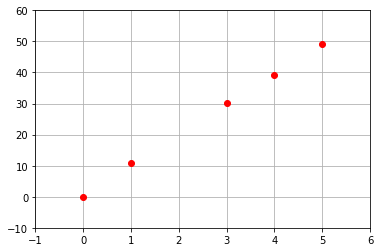

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.array([[1.0,0.0],[1.0,1.0],[1.0,3.0],[1.0,4.0],[1.0,5.0]])
Y = np.array([0.0,10.84,30.14,39.24,49.04])
plt.plot(X[:,1],Y,'ro')
plt.xlim(-1,6)
plt.ylim(-10,60)
plt.grid(True)
plt.show()

[ 0.55581395  9.72930233]


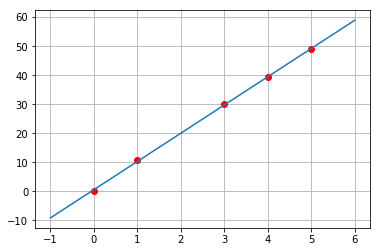

In [2]:
theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
print theta
b = theta[0]; theta = theta[1]
plt.plot(X[:,1],Y,'ro') # 画点
plt.plot([-1,6],[theta*-1+b,theta*6+b]) # 画线，方法过于简单粗暴
plt.grid(True)
plt.show()

In [ ]:
# TODO: Calculate and print loss function.
# Follow your code:


# finish

##  2.  What is classifier ?##
训练数据（Train Data）: 训练模型所使用的数据，比如上一示例中的 X,Y。

总结训练数据并预测新数据的离散结果 -> 分类 -> “明天是晴天还是雨天？”

总结训练数据并预测新数据的连续结果 -> 回归 -> “明天气温多少度？”

常见的分类模型：人脸识别，指纹识别...

常见的回归模型：房价预测...

监督式学习（英语：Supervised learning），是一个机器学习中的方法，可以由训练资料中学到或建立一个模式（函数 / learning model），并依此模式推测新的实例。训练资料是由输入物件（通常是向量）和预期输出所组成。函数的输出可以是一个连续的值（称为回归分析），或是预测一个分类标签（称作分类）。

分类和线性回归 都属于 监督学习。

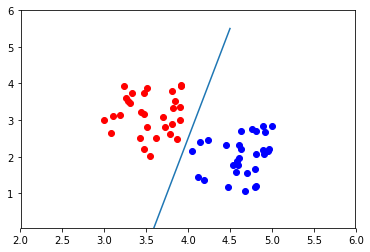

In [3]:
import random
random.seed(0)
X = list()
y = list()
for _ in xrange(30):
    X.append([random.uniform(3,4),random.uniform(2,4)])
    y.append(1)

for _ in xrange(30):
    X.append([random.uniform(4,5),random.uniform(1,3)])
    y.append(2)

X = np.array(X)
y = np.array(y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x1,x2 = np.meshgrid(np.arange(x1_min-1,x1_max+1,0.02),np.arange(x2_min-1,x2_max+1,0.02))
plt.figure(dpi=300)
plt.plot(X[:,0][:30],X[:,1][:30],'ro')
plt.plot(X[:,0][30:],X[:,1][30:],'bo')
plt.xlim(x1_min-1,x1_max+1)
plt.ylim(x2_min-1,x1_max+1)
plt.plot(np.array([3.5,4.5]),np.array([-0.5,5.5]))
plt.savefig("result2.png",dpi=300)
plt.show()

### 2.1 最简单易用的分类器 -- K 近邻###

K 近邻：找出和我**长得像**的 K 个数据，哪类最多我就属于哪类。

长得像：$d(x^i,x^k) = \sqrt{\sum_{n=1}^{m}{(x_n^i-x_n^k)^2}}$，值越小越像。

示例：

$$ 
X^1 = \left[\begin{matrix} 1 \\ 2 \\ 3\end{matrix}\right] \qquad
X^2 = \left[\begin{matrix} 1 \\ 0 \\ 2\end{matrix}\right] \qquad
X^3 = \left[\begin{matrix} 2 \\ 2 \\ 2\end{matrix}\right] \\
d(X^1,X^2) = \sqrt{(1-1)^2+(2-0)^2+(3-2)^2} = \sqrt{5} \\
d(X^1,X^3) = \sqrt{(1-2)^2+(2-2)^2+(3-2)^2} = \sqrt{2} \\
$$

所以，$X^1$ 更像 $X^3$。

在实际中，可以重新定义 长得像 这个函数。实现不同的分类结果，示例如下：

$$
d(x^i,x^k) = \sum_{n=1}^{m}{(\vert x_n^i - x_n^k \vert)} \quad \text{L1 距离}
$$

除了 L1 距离外，可以参考余弦定理。

kNN 属于非线性分类器。

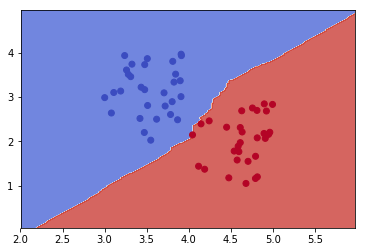

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10).fit(X,y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x1,x2 = np.meshgrid(np.arange(x1_min-1,x1_max+1,0.02),np.arange(x2_min-1,x2_max+1,0.02))
z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)
plt.figure(dpi=300)
plt.contourf(x1,x2,z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show()

### 2.2 线性分类器鼻祖——感知机  ###

感知机：只关心对错之分，是最基础的线性分类器（感觉可以说是鼻祖了），在此之后有逻辑回归和线性 SVM 两个改进的分类器。

这里我们只针对二元分类，既只存在两个 label 的数据，为了方便设为 1 和 -1 。

设 $X \in \mathbb{R}^{m\cdot n}$，感知机算法是先将整个$X$集合映射到一维数轴上，即$w \in \mathbb{R}^n$，$b \in \mathbb{R},\forall x_i \in X,s_i = w^T \cdot x + b$，当$s_i \ge 0$，$y_i = 1$；$s_i < 0$，$y_i = -1$。

这里我们需要制定一个 loss function 来衡量 w,b 对结果分类的完美程度，还需要来告诉我们如何调整 w,b 的值（可求一阶导数）。

对于错误集合$M$，$x_i \in M$：
$$
\text{loss}(w,b) = -\sum_{x_i\in M}{y_i(w^T\cdot x_i+b)}
$$

其中，loss 越小，分类越完美，loss 大于等于 0。

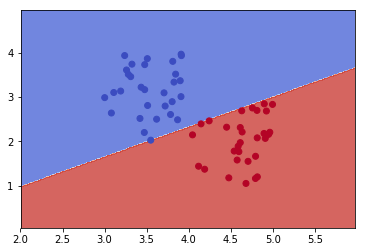

In [5]:
from sklearn.linear_model import Perceptron
clf = Perceptron(penalty=None,n_iter=3000).fit(X,y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x1,x2 = np.meshgrid(np.arange(x1_min-1,x1_max+1,0.02),np.arange(x2_min-1,x2_max+1,0.02))
z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)
plt.figure(dpi=300)
plt.contourf(x1,x2,z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show()

### 2.3 线性支持向量机  ###

SVM 是最大化各点到 $w\cdot x+b = 0$ 超平面的距离(margin)。

相较于感知机，SVM 最终结果更稳定，不会出现“相切”的结果。

SVM 有多种实现形式，PPT 中的算法是比较容易实现的一种形式，但大概原理都是一个。

这里不再过多推导 PPT 中的 SVM 的公式，因为严格来说：PPT 中的 SVM 算法仍需要改进才能正常改进。

更多可参考 [知乎专栏](https://zhuanlan.zhihu.com/p/20945670)。

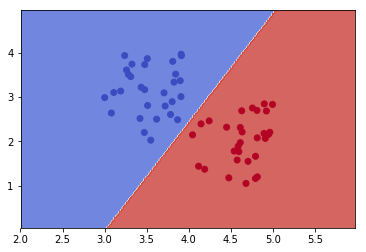

In [6]:
from sklearn.svm import SVC
clf = SVC(C=10000,kernel="linear").fit(X,y)
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
x1,x2 = np.meshgrid(np.arange(x1_min-1,x1_max+1,0.02),np.arange(x2_min-1,x2_max+1,0.02))
z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)
plt.figure(dpi=300)
plt.contourf(x1,x2,z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.show()